# TASK 5- To explore Business Analytics



In [33]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [17]:
df_orders=pd.read_csv("/home/ritika/Downloads/SampleSuperstore.csv")

In [18]:
df_orders.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [20]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [21]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [22]:
df.drop_duplicates(keep = "first",inplace = True)

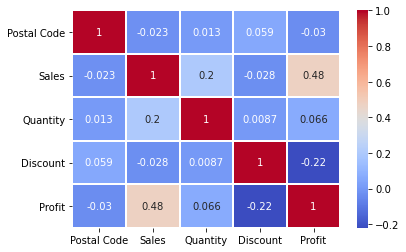

In [25]:
sns.heatmap(df.corr(),linewidths=1,annot=True,square=False,cmap="coolwarm")

Sales and profit have the maximum correlation among all the feature pairs

In [28]:
country = pd.Series(np.array(df['Country']))
country.describe()

count              9977
unique                1
top       United States
freq               9977
dtype: object

In [29]:
city = pd.Series(np.array(df['City']))
city.describe()

count              9977
unique              531
top       New York City
freq                914
dtype: object

In [30]:


category = pd.Series(np.array(df['Category']))
category.describe()



count                9977
unique                  3
top       Office Supplies
freq                 6012
dtype: object

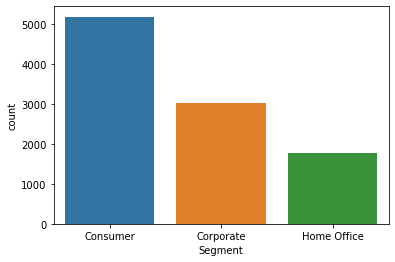

In [34]:
sns.countplot(df['Segment'])
plt.show()

Consumer segment is the highest whereas home office is the least.

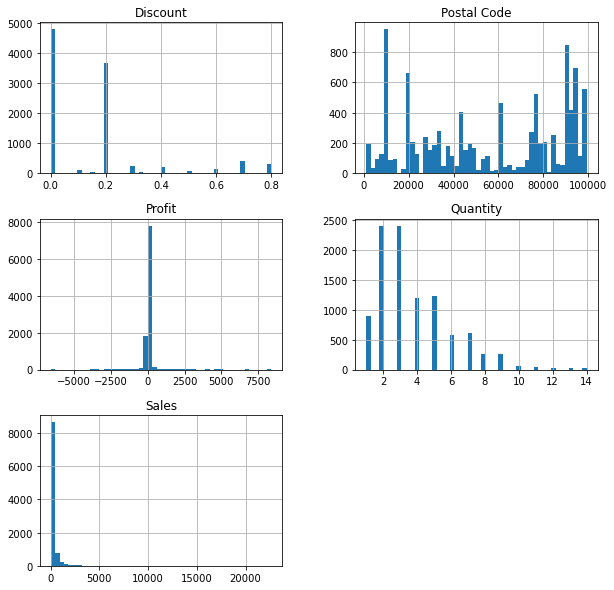

In [35]:
df.hist(figsize=(10,10),bins=50)
plt.show()

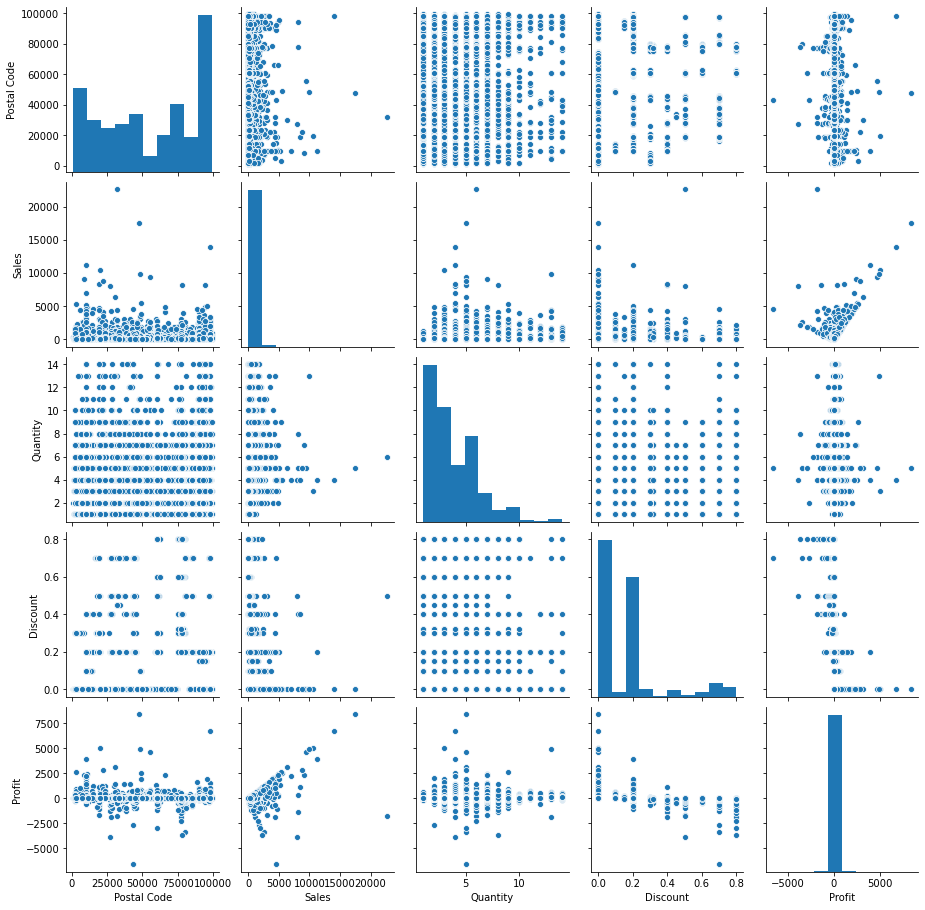

In [36]:


sns.pairplot(df)
plt.show()



# Observation 1
Postal code can be dropped since it doesn't give the right idea about the profit.

After a cetain point profit increases as sales increase and before that point profit increases as sales decreases.

Quantity is very less dependent of the discount.


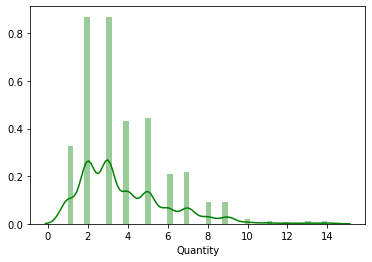

In [37]:
sns.distplot(df['Quantity'], color= 'green')
plt.show()


# Observation 2
Quanity is the most when there are 2-3 members.

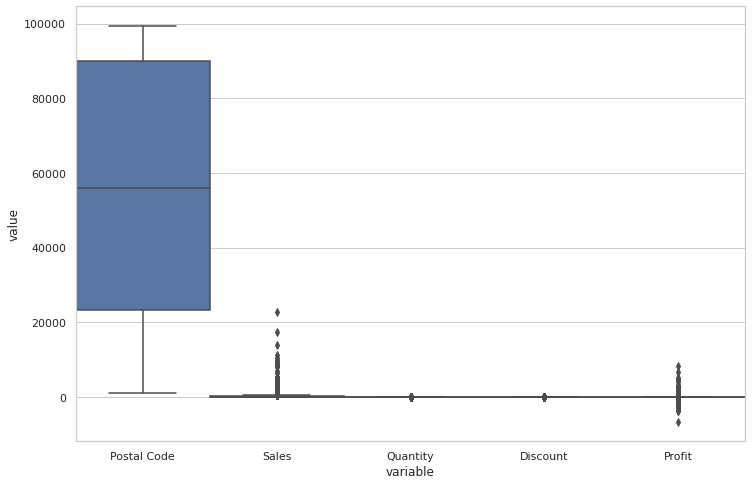

In [38]:


df_con=df.select_dtypes(include=[np.number])
plt.figure(figsize=[12,8])
sns.set(style="whitegrid")
sns.boxplot(x="variable", y="value", data=pd.melt(df_con), width=1)

plt.show()



# Removing the outliers

In [39]:
def remove_outlier(dataset,k=3.33):
    for col in dataset.columns:
            if (dataset[col].dtype=="int64" or dataset[col].dtype=="float64"):
                mean = dataset[col].mean()
                global ds      
                std = dataset[col].std()    
                outlier = [i for i in dataset[col] if (i > mean - k * std)]
                outlier = [i for i in outlier if (i < mean + k * std)]       
                ds = dataset.loc[dataset[col].isin(outlier)]


In [40]:
remove_outlier(df,k=3.33)


In [41]:
ds.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [42]:
ds.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9889.000000,9889.000000,9889.000000,9889.000000,9889.000000
mean,55243.565173,196.570036,3.776519,0.155131,24.150294
std,32060.297300,383.949264,2.222506,0.204991,94.164961
min,1040.000000,0.444000,1.000000,0.000000,-734.526400
25%,23223.000000,17.088000,2.000000,0.000000,1.747200
50%,57103.000000,52.990000,3.000000,0.200000,8.611200
75%,90008.000000,203.520000,5.000000,0.200000,28.857600
max,99301.000000,8187.650000,14.000000,0.800000,793.716000


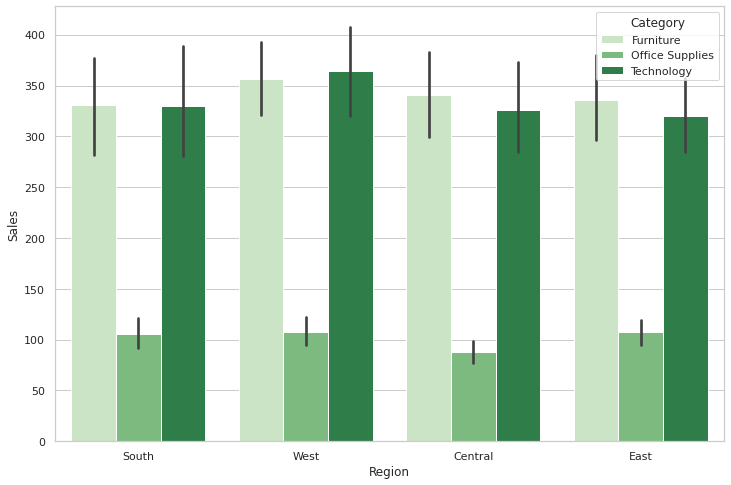

In [48]:
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Region", y="Sales", hue="Category", data=ds, palette="Greens")

# Observation 3
Sales is highest in the west region when the category is technology

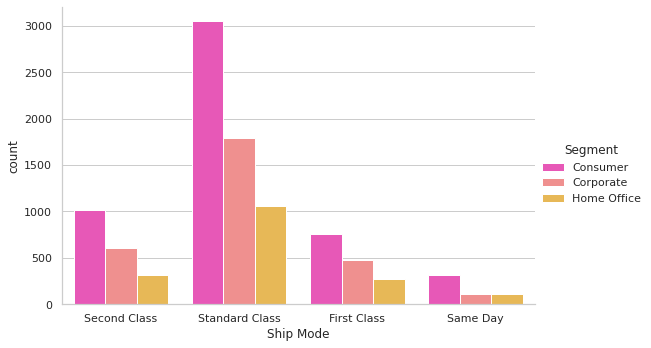

In [49]:
sns.catplot("Ship Mode", hue="Segment", data=ds, kind="count", aspect=1.5, palette="spring")

# Observation 4
Customer count is highest when the ship mode is standard class

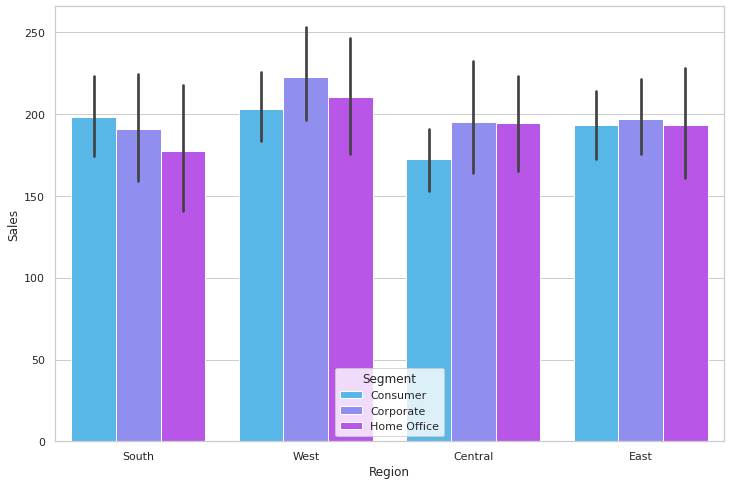

In [50]:
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Region", y="Sales", hue="Segment", data=ds, palette="cool")

   # Observation 5
   The above graph tells that the sales for home office supplies is low for almost all the regions.
    
    Sales for the western region is highest in all the segments.

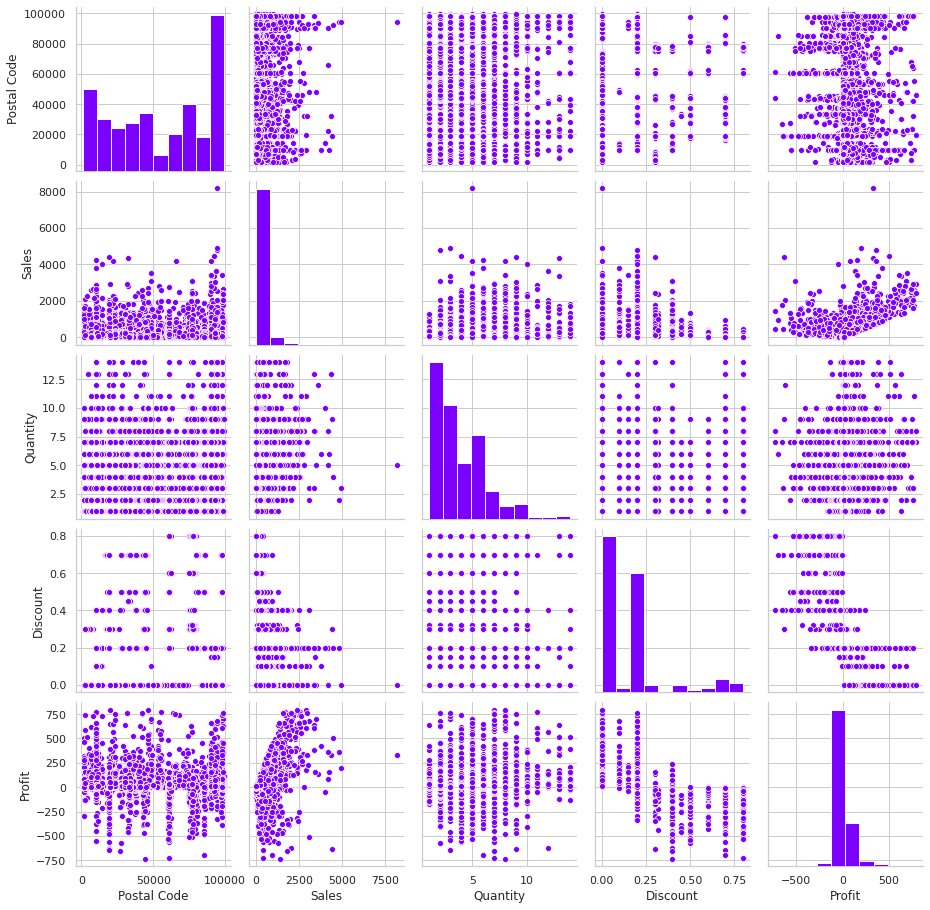

In [51]:
sns.set_palette('gist_rainbow_r')
sns.pairplot(ds)


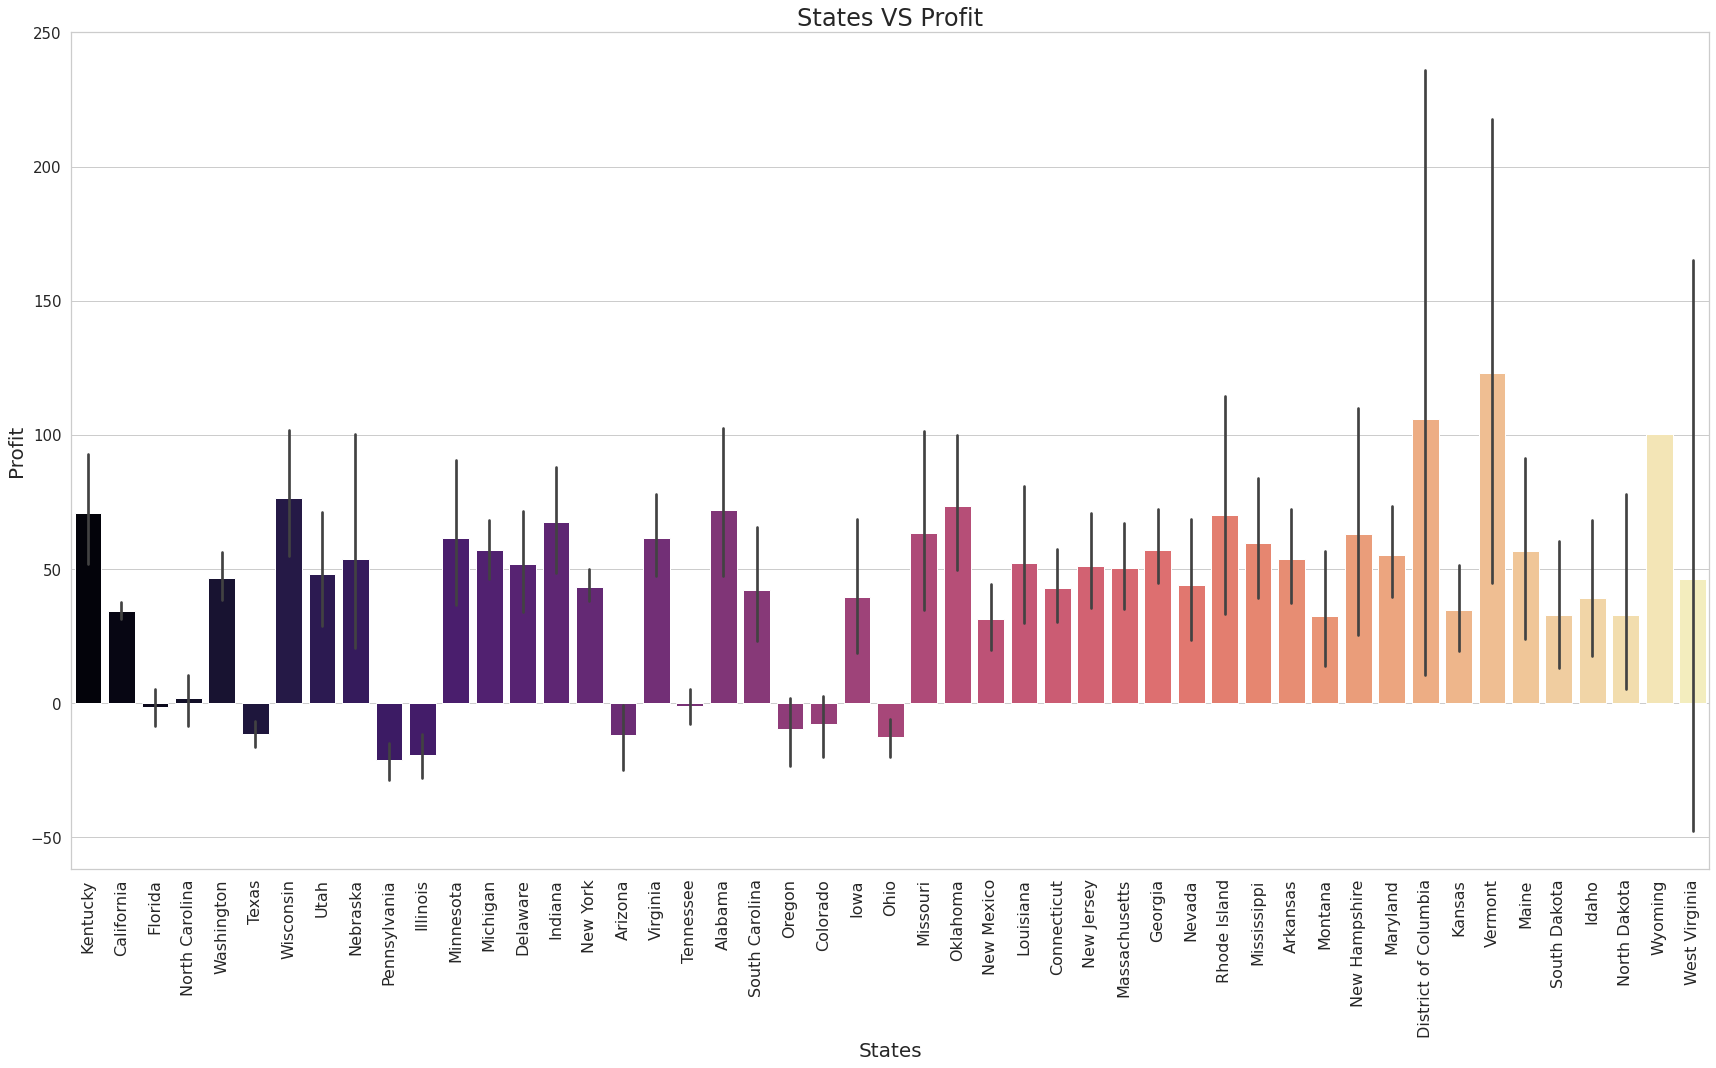

In [52]:
plt.figure(figsize=[24,15])
ax = sns.barplot(x="State", y="Profit", data=ds, palette="magma",)
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=15)
plt.title("States VS Profit",fontsize=24)
plt.xlabel("States",fontsize=20)
plt.ylabel("Profit",fontsize=20)
plt.tight_layout()

# Observation 5
'District of Columbia', 'Vermont','Wyoming' states are generate high profits.

'Texas', 'Pennsylvania','Illinois','Arizona','Oregon','Colorado','Ohio' generate loss. Steps need to be taken in order to get better profits.



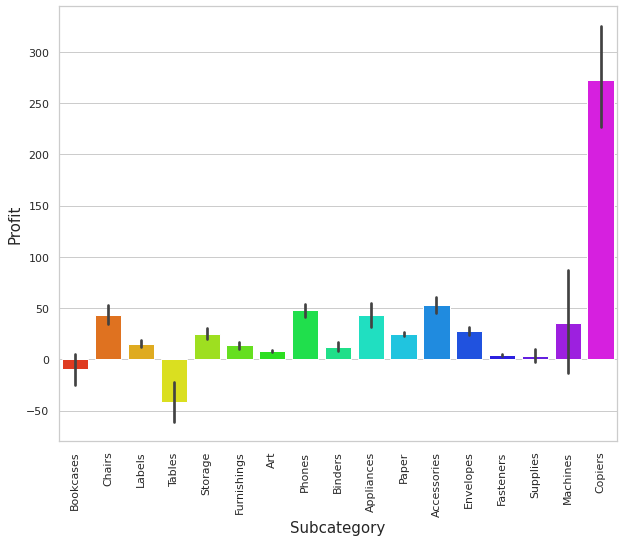

In [53]:
plt.figure(figsize=[10,8])
ax = sns.barplot(x="Sub-Category", y="Profit", data=ds, palette="gist_rainbow")
plt.xlabel("Subcategory", fontsize=15)
plt.ylabel("Profit",fontsize=15)
plt.xticks(rotation=90)
plt.show()

# Observation 6
Maximum profit is generated by the copiers.
'Tables' and 'Bookcases' are causing loss. Steps need to be taken for these subcategories to ensure high profit from them


   # Conclusion:
   Observations 1 to 6 show are the major points observed in the analysis of this dataset.